In [1]:
import os
import string

In [2]:
class Edge:
    def __init__(self,first_country,second_country,distance):
        self.first_vert = first_country
        self.second_vert = second_country
        self.dist = distance

In [3]:
with open('europe.txt') as f:
    data = [line.rstrip('\n') for line in f]
    
adjacency_list = []
kost = []
for name in data:
    f_c = name.find(',')
    s_c = name.rfind(',')
    first_country = name[:f_c]
    second_country = name[f_c+2:s_c]
    distance = name[s_c+2:]
    kost.append([first_country,second_country,{'weight':distance}])
    adjacency_list.append(Edge(first_country,second_country,distance))

In [4]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(kost)
# for edge in adjacency_list:
#     G.add_edge(edge.first_vert,edge.second_vert, weight = edge.dist)

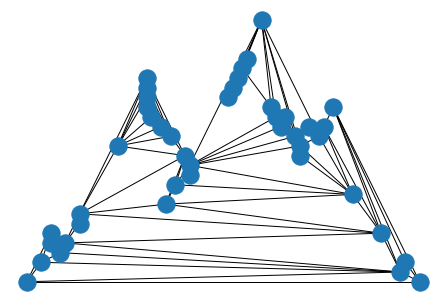

In [5]:
nx.draw_planar(G)

In [6]:
from pyvis.network import Network

net = Network("1080px", "1080px",notebook = True)
net.from_nx(G)
#net.show("NET.html")

In [7]:
print(G.number_of_nodes())
print(G.number_of_edges())

43
85


In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse = True)

In [9]:
print(max(degree_sequence))
print(min(degree_sequence))

9
1


In [10]:
nx.algorithms.distance_measures.radius(G)

4

In [11]:
nx.algorithms.distance_measures.diameter(G)

8

In [12]:
cycles = nx.cycle_basis(G, )
print(min(cycles))

['Albania', 'Greece', 'Northern Macedonia']


In [13]:
nx.algorithms.distance_measures.center(G)

['Poland']

In [14]:
print(nx.algorithms.connectivity.node_connectivity(G))
print(nx.algorithms.connectivity.edge_connectivity(G))

1
1


In [15]:
colors = nx.algorithms.coloring.greedy_color(G)

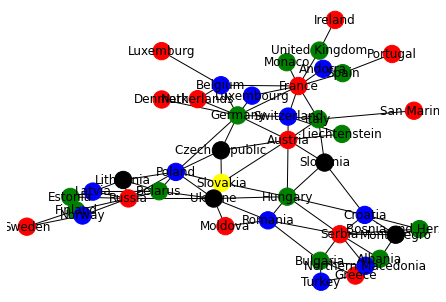

<Figure size 432x1008 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
color_map = []

for node in G:
    if colors[node]==0:
        color_map.append('red')
    elif colors[node]==1: 
        color_map.append('green')
    elif colors[node]==2: 
        color_map.append('blue')
    elif colors[node]==3: 
        color_map.append('black')
    elif colors[node]==4: 
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)
fig = plt.figure()
fig.set_size_inches(6, 14, forward = True)
plt.show()
fig.savefig('test2png.pdf', dpi=200)

In [17]:
from networkx.algorithms import approximation
cliq =  approximation.max_clique(G)

B = nx.Graph()
for node in cliq:
    B.add_node(node)
    
for first_edge in cliq:
    for second_edge in cliq:
        if (first_edge!=second_edge):
            B.add_edge(first_edge,second_edge)

net2 = Network("1080px", "1080px",notebook = True)
net2.from_nx(B)
#net2.show("nr.html")

In [20]:
from networkx.algorithms import approximation

stable_set = approximation.maximum_independent_set(G)
stable_set

{'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Denmark',
 'Estonia',
 'Finland',
 'Luxembourg',
 'Moldova',
 'Monaco',
 'Portugal',
 'San Marino',
 'United Kingdom'}

In [99]:
namings = {}
B = nx.Graph()
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1
        
new_kost = []

for first_node, second_node,weight in kost:
    new_kost.append([first_node,second_node,{"weight":int(weight["weight"])}])

B.add_edges_from(new_kost)

max_match = nx.algorithms.matching.max_weight_matching(B,False,weight= "weight")
max_match

{('Andorra', 'France'),
 ('Austria', 'Liechtenstein'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Montenegro'),
 ('Estonia', 'Latvia'),
 ('Germany', 'Luxembourg'),
 ('Ireland', 'United Kingdom'),
 ('Lithuania', 'Belarus'),
 ('Luxemburg', 'Belgium'),
 ('Moldova', 'Romania'),
 ('Northern Macedonia', 'Greece'),
 ('Norway', 'Russia'),
 ('Poland', 'Czech Republic'),
 ('Serbia', 'Albania'),
 ('Slovakia', 'Ukraine'),
 ('Slovenia', 'Hungary'),
 ('Spain', 'Portugal'),
 ('Sweden', 'Finland'),
 ('Switzerland', 'Italy')}

In [60]:
min_vertex_cover = approximation.min_weighted_vertex_cover(B,weight= "weight")


In [62]:
min_edge = nx.algorithms.covering.min_edge_cover(B)
min_edge

{('Andorra', 'France'),
 ('Austria', 'Slovenia'),
 ('Belgium', 'Netherlands'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Hungary'),
 ('Denmark', 'Germany'),
 ('Estonia', 'Latvia'),
 ('France', 'Monaco'),
 ('Germany', 'Denmark'),
 ('Germany', 'Luxembourg'),
 ('Ireland', 'United Kingdom'),
 ('Lithuania', 'Belarus'),
 ('Luxemburg', 'Belgium'),
 ('Moldova', 'Romania'),
 ('Monaco', 'France'),
 ('Montenegro', 'Bosnia and Herzegovina'),
 ('Netherlands', 'Belgium'),
 ('Northern Macedonia', 'Greece'),
 ('Norway', 'Russia'),
 ('Poland', 'Czech Republic'),
 ('San Marino', 'Italy'),
 ('Serbia', 'Albania'),
 ('Slovakia', 'Ukraine'),
 ('Spain', 'Portugal'),
 ('Sweden', 'Finland'),
 ('Switzerland', 'Liechtenstein')}

In [63]:
path = nx.algorithms.euler.eulerize(B)
print(list(nx.algorithms.euler.eulerian_path(path)))

[('Albania', 'Serbia'), ('Serbia', 'Romania'), ('Romania', 'Bulgaria'), ('Bulgaria', 'Romania'), ('Romania', 'Moldova'), ('Moldova', 'Ukraine'), ('Ukraine', 'Russia'), ('Russia', 'Norway'), ('Norway', 'Sweden'), ('Sweden', 'Finland'), ('Finland', 'Norway'), ('Norway', 'Finland'), ('Finland', 'Russia'), ('Russia', 'Poland'), ('Poland', 'Ukraine'), ('Ukraine', 'Belarus'), ('Belarus', 'Poland'), ('Poland', 'Lithuania'), ('Lithuania', 'Russia'), ('Russia', 'Latvia'), ('Latvia', 'Lithuania'), ('Lithuania', 'Belarus'), ('Belarus', 'Russia'), ('Russia', 'Estonia'), ('Estonia', 'Latvia'), ('Latvia', 'Belarus'), ('Belarus', 'Ukraine'), ('Ukraine', 'Romania'), ('Romania', 'Hungary'), ('Hungary', 'Ukraine'), ('Ukraine', 'Slovakia'), ('Slovakia', 'Poland'), ('Poland', 'Slovakia'), ('Slovakia', 'Hungary'), ('Hungary', 'Slovenia'), ('Slovenia', 'Italy'), ('Italy', 'San Marino'), ('San Marino', 'Italy'), ('Italy', 'Switzerland'), ('Switzerland', 'Germany'), ('Germany', 'Poland'), ('Poland', 'Czech Re

In [67]:
komp = nx.algorithms.approximation.kcomponents.k_components(B,2)
#komp

In [72]:
komp_edge = list(nx.algorithms.connectivity.edge_kcomponents.k_edge_components(G, 2))
#komp_edge

In [81]:
need_to_draw_tree = nx.algorithms.components.biconnected_components(B)
max_len = 0
max_elem = {}
for elem in need_to_draw_tree:
    if len(elem)>max_len:
        max_len = len(elem)
        max_elem = elem
print(max_elem)

{'Slovenia', 'Liechtenstein', 'Northern Macedonia', 'Moldova', 'Montenegro', 'Slovakia', 'Bosnia and Herzegovina', 'Lithuania', 'Serbia', 'Greece', 'Ukraine', 'Switzerland', 'Germany', 'Bulgaria', 'Poland', 'Italy', 'Russia', 'Croatia', 'Austria', 'Turkey', 'Netherlands', 'Albania', 'Hungary', 'Luxembourg', 'Estonia', 'Latvia', 'Czech Republic', 'France', 'Belgium', 'Romania', 'Belarus'}


In [100]:
namings = {}
C = nx.Graph()
        
new_kost3 = []

for first_node, second_node,weight in kost:
    new_kost3.append([first_node,second_node,int(weight["weight"])])

C.add_weighted_edges_from(new_kost3)


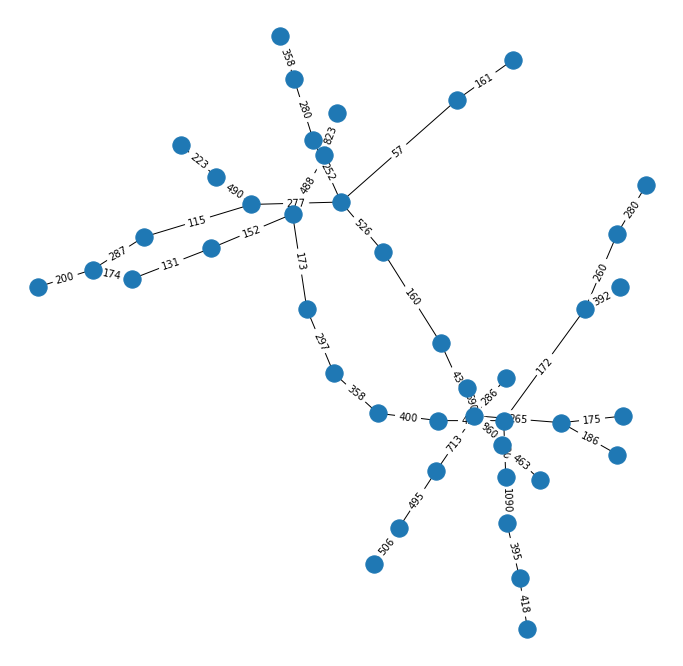

In [165]:
#я пытался сделать это адекватно, но у меня не вышло, поэтому держи два возможных отображения
min_tree = nx.algorithms.tree.mst.minimum_spanning_tree(C)
net3 = Network("1080px", "1080px",notebook = True)
pos=nx.spring_layout(min_tree) 
labels1 = nx.get_edge_attributes(min_tree,'weight')
labels = nx.get_node_attributes(min_tree,"node")
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels1 )
plt.figure(3,figsize=(5,5)) 
nx.draw(min_tree,pos)
plt.show()
net3.from_nx(min_tree)
            
#net3.show("tree.html")

In [168]:
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1

new_kost4 = []

for first_node, second_node,weight in kost:
    new_kost4.append([namings[first_node],namings[second_node],{"weight":int(weight["weight"])}])

H = nx.Graph()
H.add_edges_from(new_kost4)
H.edges

EdgeView([(0, 36), (0, 1), (0, 2), (0, 3), (36, 24), (36, 2), (36, 26), (1, 23), (1, 27), (1, 3), (2, 24), (2, 3), (3, 23), (3, 24), (3, 27), (3, 8), (3, 25), (4, 20), (4, 5), (20, 19), (20, 7), (20, 9), (20, 33), (20, 34), (20, 5), (20, 13), (20, 35), (5, 42), (6, 28), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (28, 7), (28, 16), (28, 11), (7, 19), (7, 29), (7, 33), (7, 22), (7, 16), (7, 13), (8, 27), (8, 11), (8, 12), (8, 18), (8, 25), (9, 38), (9, 12), (9, 13), (10, 13), (11, 16), (11, 18), (12, 27), (14, 39), (14, 15), (14, 16), (14, 17), (14, 18), (39, 30), (39, 15), (39, 17), (15, 16), (15, 17), (16, 17), (16, 18), (17, 30), (17, 31), (17, 41), (17, 18), (18, 40), (18, 25), (19, 21), (19, 22), (23, 27), (24, 25), (24, 26), (25, 40), (31, 41), (31, 32), (41, 32), (35, 37)])